---
title: "Spam Classifier Model"
date: "2024-01-01"
categories: [python]
format: html
---


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)


2.18.0


In [31]:
# import requests

# url = "https://cdn.freecodecamp.org/project-data/sms/train-data.tsv"
# query_parameters = {"downloadformat": "tsv"}

# response = requests.get(url, params=query_parameters)

# with open("train-data.tsv", mode="wb") as file:
#     file.write(response.content)

# url = "https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv"
# query_parameters = {"downloadformat": "tsv"}

# response = requests.get(url, params=query_parameters)

# with open("valid-data.tsv", mode="wb") as file:
#     file.write(response.content)


In [32]:
train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"


In [33]:
header_names = ["label", "message"]

df_train = pd.read_csv(
    train_file_path, sep="\t", encoding="utf-8", header=None, names=header_names
)
df_test = pd.read_csv(
    test_file_path, sep="\t", encoding="utf-8", header=None, names=header_names
)


In [34]:
df_test.sample(5)

,label,message
1349,ham,yeah sure thing mate haunt got all my stuff so...
725,ham,"i just got home babe, are you still awake ?"
234,ham,finally it has happened..! aftr decades..! bee...
1191,ham,"it‘s £6 to get in, is that ok?"
715,ham,hello. damn this christmas thing. i think i ha...


In [35]:
label_map = {"ham": 0, "spam": 1}

df_train["label"] = df_train["label"].map(label_map)
df_test["label"] = df_test["label"].map(label_map)

In [36]:
entity_map = {
    "&#33;": "!",
    "&#34;": '"',
    "&#35;": "#",
    "&#36;": "$",
    "&#37;": "%",
    "&#38;": "&",
    "&#39;": "'",
    "&#40;": "(",
    "&#41;": ")",
    "&#42;": "*",
    "&#43;": "+",
    "&#44;": ",",
    "&#45;": "-",
    "&#46;": ".",
    "&#47;": "/",
    "&#48;": "0",
    "&#49;": "1",
    "&#50;": "2",
    "&#51;": "3",
    "&#52;": "4",
    "&#53;": "5",
    "&#54;": "6",
    "&#55;": "7",
    "&#56;": "8",
    "&#57;": "9",
    "&#58;": ":",
    "&#59;": ";",
    "&#60;": "<",
    "&#61;": "=",
    "&#62;": ">",
    "&#63;": "?",
    "&#64;": "@",
    "&#65;": "A",
    "&#66;": "B",
    "&#67;": "C",
    "&#68;": "D",
    "&#69;": "E",
    "&#70;": "F",
    "&#71;": "G",
    "&#72;": "H",
    "&#73;": "I",
    "&#74;": "J",
    "&#75;": "K",
    "&#76;": "L",
    "&#77;": "M",
    "&#78;": "N",
    "&#79;": "O",
    "&#80;": "P",
    "&#81;": "Q",
    "&#82;": "R",
    "&#83;": "S",
    "&#84;": "T",
    "&#85;": "U",
    "&#86;": "V",
    "&#87;": "W",
    "&#88;": "X",
    "&#89;": "Y",
    "&#90;": "Z",
    "&#91;": "[",
    "&#92;": "\\",
    "&#93;": "]",
    "&#94;": "^",
    "&#95;": "_",
    "&#96;": "`",
    "&#97;": "a",
    "&#98;": "b",
    "&#99;": "c",
    "&#100;": "d",
    "&#101;": "e",
    "&#102;": "f",
    "&#103;": "g",
    "&#104;": "h",
    "&#105;": "i",
    "&#106;": "j",
    "&#107;": "k",
    "&#108;": "l",
    "&#109;": "m",
    "&#110;": "n",
    "&#111;": "o",
    "&#112;": "p",
    "&#113;": "q",
    "&#114;": "r",
    "&#115;": "s",
    "&#116;": "t",
    "&#117;": "u",
    "&#118;": "v",
    "&#119;": "w",
    "&#120;": "x",
    "&#121;": "y",
    "&#122;": "z",
    "&#123;": "{",
    "&#124;": "|",
    "&#125;": "}",
    "&#126;": "~",
    "&larr;": "←",
    "&uarr;": "↑",
    "&rarr;": "→",
    "&darr;": "↓",
    "&harr;": "↔",
    "&lArr;": "⇐",
    "&uArr;": "⇑",
    "&rArr;": "⇒",
    "&dArr;": "⇓",
    "&hArr;": "⇔",
    "&lsquo;": "‘",
    "&rsquo;": "’",
    "&ldquo;": "“",
    "&rdquo;": "”",
    "&#8218;": "‚",
    "&#8222;": "„",
    "&ndash;": "-",
    "&mdash;": "–",
    "&nbsp;": " ",
    "&iexcl;": "¡",
    "&sect;": "§",
    "&brvbar;": "¦",
    "&copy;": "©",
    "&reg;": "®",
    "&#8482;": "™",
    "&cent;": "¢",
    "&pound;": "£",
    "&yen;": "¥",
    "&euro;": "€",
    "&plusmn;": "±",
    "&micro;": "µ",
    "&183;": "·",
    "&deg;": "°",
    "&sup1;": "¹",
    "&sup2;": "²",
    "&sup3;": "³",
    "&para;": "¶",
    "&middot;": "·",
    "&frac14;": "¼",
    "&frac12;": "½",
    "&frac34;": "¾",
    "&iquest;": "¿",
    "&#8224;": "†",
    "&#8225;": "‡",
    "&#8226;": "•",
    "&#8230;": "…",
}


In [37]:
train_X = df_train["message"]
test_X = df_test["message"]

train_y = df_train["label"]
test_y = df_test["label"]


In [38]:
train_X

0       ahhhh...just woken up!had a bad dream about u ...
1                                you can never do nothing
2       now u sound like manky scouse boy steve,like! ...
3       mum say we wan to go then go... then she can s...
4       never y lei... i v lazy... got wat? dat day ü ...
                              ...                        
4174    just woke up. yeesh its late. but i didn't fal...
4175    what do u reckon as need 2 arrange transport i...
4176    free entry into our £250 weekly competition ju...
4177    -pls stop bootydelious (32/f) is inviting you ...
4178    tell my  bad character which u dnt lik in me. ...
Name: message, Length: 4179, dtype: object

In [39]:
import re
import string


def custom_standardizer(x):
    for i in entity_map:
        x = tf.strings.regex_replace(x, re.escape(i), entity_map.get(i, ""))
    x = tf.strings.lower(x)
    x = tf.strings.regex_replace(x, f"[{re.escape(string.punctuation)}]", "")

    return x


vectorization = keras.layers.TextVectorization(
    # standardize=custom_standardizer,
    max_tokens=20_000,
    output_mode="int",
    output_sequence_length=500,
)

vectorization.adapt(np.array(train_X))

In [40]:
model = tf.keras.Sequential(
    [
        vectorization,
        keras.layers.Embedding(20_000 + 1, 128, input_length=500),
        keras.layers.Dropout(0.5),
        keras.layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3),
        keras.layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3),
        keras.layers.GlobalMaxPooling1D(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation="sigmoid", name="predictions"),
    ]
)

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

model.summary()


d:\My_Projects\blog\blog\interactive\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(
    train_X,
    train_y,
    validation_data=(test_X, test_y),
    batch_size=32,
    epochs=3,
    verbose=1,
)


Epoch 1/3


131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8469 - loss: 0.4181 - val_accuracy: 0.9820 - val_loss: 0.0693
Epoch 2/3
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9828 - loss: 0.0651 - val_accuracy: 0.9856 - val_loss: 0.0606
Epoch 3/3
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9955 - loss: 0.0202 - val_accuracy: 0.9820 - val_loss: 0.0609


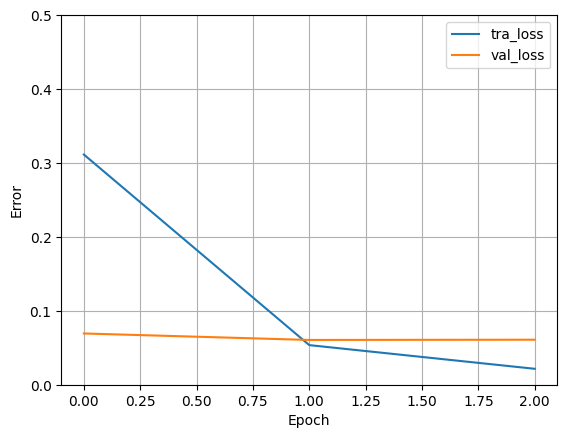

In [42]:
def plot_loss(history):
    plt.plot(history.history["loss"], label="tra_loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.ylim([0, 0.5])
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend()
    plt.grid(True)


plot_loss(history)

In [43]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
    if type(pred_text) is str:
        pred_text = np.array([pred_text]).astype(object)
    if type(pred_text) is list:
        pred_text = np.array(pred_text).astype(object)

    prediction = model.predict(pred_text)

    score = prediction[0][0]
    if score > 0.5:
        return [score, "spam"]
    else:
        return [score, "ham"]


# pred_text = "how are you doing today?"
pred_text = [
    "how are you doing today",
    "sale today! to stop texts call 98912460324",
    "i dont want to go. can we try it a different day? available sat",
    "our new mobile video service is live. just install on your phone to start watching.",
    "you have won £1000 cash! call to claim your prize.",
    "i'll bring it tomorrow. don't forget the milk.",
    "wow, is your arm alright. that happened to me one time too",
]

prediction = predict_message(pred_text)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
[np.float32(0.0054872185), 'ham']


In [44]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
    test_messages = [
        "how are you doing today",
        "sale today! to stop texts call 98912460324",
        "i dont want to go. can we try it a different day? available sat",
        "our new mobile video service is live. just install on your phone to start watching.",
        "you have won £1000 cash! call to claim your prize.",
        "i'll bring it tomorrow. don't forget the milk.",
        "wow, is your arm alright. that happened to me one time too",
    ]

    test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
    passed = True

    for msg, ans in zip(test_messages, test_answers):
        prediction = predict_message(msg)
        if prediction[1] != ans:
            passed = False

    if passed:
        print("You passed the challenge. Great job!")
    else:
        print("You haven't passed yet. Keep trying.")


test_predictions()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
You passed the challenge. Great job!
